## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,log_loss


from sklearn import tree,ensemble,metrics

## To exclude warnings

In [3]:
import warnings
import random
warnings.filterwarnings("ignore")

## Loading dataset

In [4]:
data=pd.read_csv("cleveland.csv")

## Attribute Information:

In [5]:
data.shape

(303, 14)

In [6]:
data.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

### head

In [8]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


### info 

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


### describe

In [10]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

### unique values of target column

In [11]:
data.target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [12]:
data.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

### replacing multi values of target column to binary class

In [13]:
data['target'] = np.where((data.target == 0),0,data.target)
data['target'] = np.where((data.target == 1),1,data.target)
data['target'] = np.where((data.target == 2),1,data.target)
data['target'] = np.where((data.target == 3),1,data.target)
data['target'] = np.where((data.target == 4),1,data.target)

In [14]:
data.target.value_counts()

0    164
1    139
Name: target, dtype: int64

## Patients having heart disease

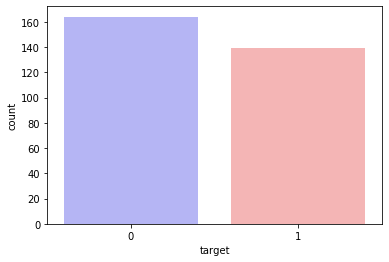

In [15]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

### relation between “Maximum Heart Rate” and “Age”.

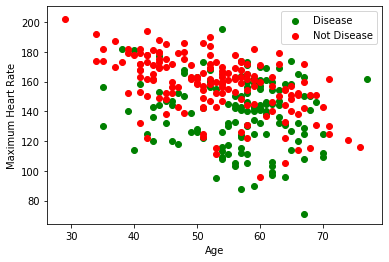

In [16]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'red')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## checking null values values

In [17]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


# Preprocessing

In [18]:
print(data["ca"].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


In [19]:
print(data["thal"].value_counts())

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64


In [20]:
data['thal'] = data.thal.fillna(data.thal.mean())
data['ca'] = data.ca.fillna(data.ca.mean())

In [21]:
print(data.isnull().sum())
X = data.iloc[:,:-1].values
y = data.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =9)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [22]:
data.target.value_counts()

0    164
1    139
Name: target, dtype: int64

# Feature extraction

In [23]:
model = RandomForestClassifier()
rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

X=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]

X_train, X_test, y_train, y_test = train_test_split(X,X.target, test_size=0.2, random_state=0)

model_tree_clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
model_tree_clf.fit(X_train,y_train)

Num Features: 1
Selected Features: [False False False False False False False  True False False False False
 False]
Feature Ranking: [ 6 11  3  7  8 13 12  1  9  2 10  5  4]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### FEATURE RANKING

In [24]:
feature_rank = pd.DataFrame(list(zip(fit.ranking_,X)),columns=['rank','feature'])
feature_rank = feature_rank.sort_values(by ='rank')
feature_rank

,rank,feature
7,1,thalach
9,2,oldpeak
2,3,cp
12,4,thal
11,5,ca
0,6,age
3,7,trestbps
4,8,chol
8,9,exang
10,10,slope


# Training data

In [25]:
y_values = data['target']

# all features
#X = data.iloc[:,:-1].values

#eliminate last 3 restecg,sex,fbs  
X=data[['age','cp','trestbps','chol','thalach','exang','oldpeak','slope','ca','thal']]


X_train, X_test, y_train, y_test = train_test_split(
    X, y_values, test_size=0.3, random_state=42)


In [26]:
print('X_train.shape : ',X_train.shape)
print('X_test.shape : ',X_test.shape)
print('y_train.shape : ',y_train.shape)
print('y_test.shape : ',y_test.shape)

X_train.shape :  (212, 10)
X_test.shape :  (91, 10)
y_train.shape :  (212,)
y_test.shape :  (91,)


## Naive bayes

In [27]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier.predict(X_test)

In [28]:
conf_mat = confusion_matrix(y_test, nb_y_pred)

print('Confusion Matrix')
print(conf_mat)


TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]


accuracyn = round( ((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errorn = round((100 - accuracyn),2)

specificityn = round ( ((TN) / (TN + FP))*100,2 )
sensitivityn = round ( ((TP) / (TP+FN))*100 ,2 )
Recalln = round( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionn = round( ((TP)/(TP+FP))*100 ,2 )
f1_scoren = round( ((2*Precisionn*Recalln)/(Precisionn+Recalln)) ,2 )


print("Accuracy                  : ",accuracyn)
print('Classification Error Rate : ', errorn)
print('specificity               : ',specificityn)
print('sensitivity or Recall     : ',sensitivityn)
print('Precision                 : ',Precisionn)
print('f1 score                  : ',f1_scoren)


Confusion Matrix
[[39  9]
 [ 9 34]]
Accuracy                  :  80.22
Classification Error Rate :  19.78
specificity               :  79.07
sensitivity or Recall     :  81.25
Precision                 :  81.25
f1 score                  :  81.25


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
lr_pred = clf.predict(X_test)

In [30]:
conf_mat = confusion_matrix(y_test, lr_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyl = round( ((TP+TN)/(TP+TN+FP+FN))*100 , 2 )
errorl = round ( 100 - accuracyl ,2)

specificityl = round ( ((TN) / (TN + FP))*100 ,2)
sensitivityl = round ( ((TP) / (TP+FN))*100 ,2)
Recalll = round ( ((TP)/(TP+FN))*100 ,2) #sensitivity
Precisionl = round ( ( (TP)/(TP+FP) )*100 ,2)
f1_scorel = round ( ( (2*Precisionl*Recalll)/(Precisionl+Recalll) ) ,2)

print("Accuracy                  : ",accuracyl)
print('Classification Error Rate : ', errorl)
print('specificity               : ',specificityl)
print('sensitivity or Recall     : ',sensitivityl)
print('Precision                 : ',Precisionl)
print('f1 score                  : ',f1_scorel)

Confusion Matrix
[[40  8]
 [ 5 38]]
Accuracy                  :  85.71
Classification Error Rate :  14.29
specificity               :  82.61
sensitivity or Recall     :  88.89
Precision                 :  83.33
f1 score                  :  86.02


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

# Predicting the Test set results
DT_y_pred = classifier.predict(X_test)

In [32]:
conf_mat = confusion_matrix(y_test, DT_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyd = round (((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errord = round (100 - accuracyd ,2)

specificityd =  round (((TN) / (TN + FP))*100 ,2)
sensitivityd =  round (((TP) / (TP+FN))*100 ,2)
Recalld =  round (((TP)/(TP+FN))*100 ,2) #sensitivity
Precisiond =  round (((TP)/(TP+FP))*100 ,2)
f1_scored =  round (((2*Precisiond*Recalld)/(Precisiond+Recalld)) ,2)

print("Accuracy                  : ",accuracyd)
print('Classification Error Rate : ', errord)
print('specificity               : ',specificityd)
print('sensitivity or Recall     : ',sensitivityd)
print('Precision                 : ',Precisiond)
print('f1 score                  : ',f1_scored)

Confusion Matrix
[[37 11]
 [13 30]]
Accuracy                  :  73.63
Classification Error Rate :  26.37
specificity               :  73.17
sensitivity or Recall     :  74.0
Precision                 :  77.08
f1 score                  :  75.51


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
RF_y_pred = classifier.predict(X_test)

In [34]:
conf_mat = confusion_matrix(y_test, RF_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyr = round( ((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errorr = round( 100 - accuracyr ,2)

specificityr =  round( ((TN) / (TN + FP))*100 ,2)
sensitivityr =  round( ((TP) / (TP+FN))*100 ,2)
Recallr =  round( ((TP)/(TP+FN))*100 ,2) #sensitivity
Precisionr =  round( ((TP)/(TP+FP))*100 ,2)
f1_scorer =  round( ((2*Precisionr*Recallr)/(Precisionr+Recallr)) ,2)

print("Accuracy                  : ",accuracyr)
print('Classification Error Rate : ', errorr)
print('specificity               : ',specificityr)
print('sensitivity or Recall     : ',sensitivityr)
print('Precision                 : ',Precisionr)
print('f1 score                  : ',f1_scorer)


Confusion Matrix
[[42  6]
 [ 9 34]]
Accuracy                  :  83.52
Classification Error Rate :  16.48
specificity               :  85.0
sensitivity or Recall     :  82.35
Precision                 :  87.5
f1 score                  :  84.85


## SVM

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
svm_y_pred = classifier.predict(X_test)

In [36]:
conf_mat = confusion_matrix(y_test, svm_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracys = round ( ((TP+TN)/(TP+TN+FP+FN))*100 ,2)
errors =  round ( 100 - accuracys ,2)

specificitys =  round ( ((TN) / (TN + FP))*100 ,2)
sensitivitys =  round ( ((TP) / (TP+FN))*100 ,2)
Recalls =  round ( ((TP)/(TP+FN))*100 ,2) #sensitivity
Precisions =  round ( ((TP)/(TP+FP))*100 ,2)
f1_scores =  round ( ((2*Precisions*Recalls)/(Precisions+Recalls)) ,2)

print("Accuracy                  : ",accuracys)
print('Classification Error Rate : ', errors)
print('specificity               : ',specificitys)
print('sensitivity or Recall     : ',sensitivitys)
print('Precision                 : ',Precisions)
print('f1 score                  : ',f1_scores)


Confusion Matrix
[[39  9]
 [23 20]]
Accuracy                  :  64.84
Classification Error Rate :  35.16
specificity               :  68.97
sensitivity or Recall     :  62.9
Precision                 :  81.25
f1 score                  :  70.91


## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,30)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))


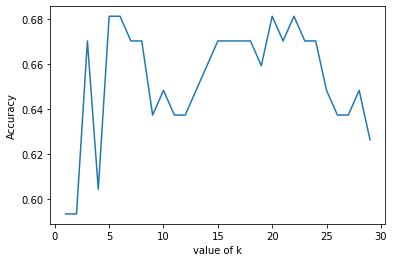

In [38]:
%matplotlib inline
plt.plot(k_range,scores_list)
plt.xlabel('value of k')
plt.ylabel('Accuracy')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn = knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)

In [40]:
conf_mat = confusion_matrix(y_test, knn_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyk =  round( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errork =  round( 100 - accuracyk , 2)

specificityk =  round( ((TN) / (TN + FP))*100 , 2)
sensitivityk =  round( ((TP) / (TP+FN))*100 , 2)
Recallk =  round( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionk =  round( ((TP)/(TP+FP))*100 , 2)
f1_scorek =  round( ((2*Precisionk*Recallk)/(Precisionk+Recallk)) , 2)

print("Accuracy                  : ",accuracyk)
print('Classification Error Rate : ', errork)
print('specificity               : ',specificityk)
print('sensitivity or Recall     : ',sensitivityk)
print('Precision                 : ',Precisionk)
print('f1 score                  : ',f1_scorek)

Confusion Matrix
[[33 15]
 [14 29]]
Accuracy                  :  68.13
Classification Error Rate :  31.87
specificity               :  65.91
sensitivity or Recall     :  70.21
Precision                 :  68.75
f1 score                  :  69.47


## Voting Classifier

In [41]:
table1={'Algorithm':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','SVM','KNN'],
    'Accuracy':[accuracyl,accuracyr,accuracyn,accuracyd,accuracys,accuracyk],
       'Classification Error Rate':[errorl,errorr,errorn,errord,errors,errork],
        'Specificity':[specificityl,specificityr,specificityn,specificityd,specificitys,specificityk],
        'Sensitivity':[sensitivityl,sensitivityr,sensitivityn,sensitivityd,sensitivitys,sensitivityk],
        'Precision': [Precisionl,Precisionr,Precisionn,Precisiond,Precisions,Precisionk]
}

In [42]:
table2=pd.DataFrame(table1,columns=['Algorithm','Accuracy','Classification Error Rate','Specificity','Sensitivity','Precision'])

In [43]:
table2=table2.sort_values(by ='Classification Error Rate')
table2

,Algorithm,Accuracy,Classification Error Rate,Specificity,Sensitivity,Precision
0,Logistic Regression,85.71,14.29,82.61,88.89,83.33
1,Random Forest,83.52,16.48,85.00,82.35,87.50
2,Naive Bayes,80.22,19.78,79.07,81.25,81.25
3,Decision Tree,73.63,26.37,73.17,74.00,77.08
5,KNN,68.13,31.87,65.91,70.21,68.75
4,SVM,64.84,35.16,68.97,62.90,81.25


## Voting Classifier

In [44]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = BernoulliNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('nb',clf3)],voting='hard')
eclf.fit(X_train, y_train) 
y_pred = eclf.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
print ('Accuracy Score :', round( accuracy_score(y_test, y_pred)*100 ,2) )


Accuracy Score : 84.62


### EnsembleVoteClassifier

In [45]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report

logclf=LogisticRegression(penalty='l2',C=10, random_state=0)
treeclf=RandomForestClassifier(max_depth=3,criterion='entropy',random_state=0)
nb=BernoulliNB()

mv_clf= EnsembleVoteClassifier(clfs=[logclf,treeclf,nb],weights=[71,68,65])
mv_clf.fit(X_train,y_train)
v_y_pred=mv_clf.predict(X_test)

In [46]:
conf_mat = confusion_matrix(y_test, v_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyv = round( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errorv = round( 100 - accuracyv , 2)

specificityv = round( ((TN) / (TN + FP))*100 , 2)
sensitivityv = round( ((TP) / (TP+FN))*100 , 2)
Recallv = round( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionv = round(  ((TP)/(TP+FP))*100 , 2)
f1_scorev = round( ((2*Precisionv*Recallv)/(Precisionv+Recallv)) , 2)

print("Accuracy                  : ",accuracyv)
print('Classification Error Rate : ', errorv)
print('specificity               : ',specificityv)
print('sensitivity or Recall     : ',sensitivityv)
print('Precision                 : ',Precisionv)
print('f1 score                  : ',f1_scorev)


Confusion Matrix
[[39  9]
 [ 5 38]]
Accuracy                  :  84.62
Classification Error Rate :  15.38
specificity               :  80.85
sensitivity or Recall     :  88.64
Precision                 :  81.25
f1 score                  :  84.78


## Gradient boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gb_y_pred = gbc.predict(X_test)


In [48]:
conf_mat = confusion_matrix(y_test, gb_y_pred)
print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyb = round ( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errorb = round ( 100 - accuracyb , 2)

specificityb = round (  ((TN) / (TN + FP))*100 , 2)
sensitivityb = round (  ((TP) / (TP+FN))*100 , 2)
Recallb = round ( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionb = round ( ((TP)/(TP+FP))*100 , 2)
f1_scoreb = round ( ((2*Precisionb*Recallb)/(Precisionb+Recallb)) , 2)

print("Accuracy                  : ",accuracyb)
print('Classification Error Rate : ', errorb)
print('specificity               : ',specificityb)
print('sensitivity or Recall     : ',sensitivityb)
print('Precision                 : ',Precisionb)
print('f1 score                  : ',f1_scoreb)

Confusion Matrix
[[38 10]
 [ 7 36]]
Accuracy                  :  81.32
Classification Error Rate :  18.68
specificity               :  78.26
sensitivity or Recall     :  84.44
Precision                 :  79.17
f1 score                  :  81.72


## Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100)
classifier.fit(X_train, y_train)
ada_y_pred=classifier.predict(X_test)

In [50]:
conf_mat = confusion_matrix(y_test, ada_y_pred)

print('Confusion Matrix')
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracya = round ( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errora = round ( 100 - accuracya , 2)

specificitya = round ( ((TN) / (TN + FP))*100 , 2)
sensitivitya = round ( ((TP) / (TP+FN))*100 , 2)
Recalla = round ( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisiona = round ( ((TP)/(TP+FP))*100 , 2)
f1_scorea = round ( ((2*Precisiona*Recalla)/(Precisiona+Recalla)) , 2)

print("Accuracy                  : ",accuracya)
print('Classification Error Rate : ', errora)
print('specificity               : ',specificitya)
print('sensitivity or Recall     : ',sensitivitya)
print('Precision                 : ',Precisiona)
print('f1 score                  : ',f1_scorea)

Confusion Matrix
[[32 16]
 [ 8 35]]
Accuracy                  :  73.63
Classification Error Rate :  26.37
specificity               :  68.63
sensitivity or Recall     :  80.0
Precision                 :  66.67
f1 score                  :  72.73


# HYBRID MODEL

In [51]:
table={'Algorithm':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','SVM','KNN','GB','Adaboost'],
    'Accuracy':[accuracyl,accuracyr,accuracyn,accuracyd,accuracys,accuracyk,accuracyb,accuracya],
       'Classification Error Rate':[errorl,errorr,errorn,errord,errors,errork,errorb,errora],
        'Specificity':[specificityl,specificityr,specificityn,specificityd,specificitys,specificityk,specificityb,specificitya],
        'Sensitivity':[sensitivityl,sensitivityr,sensitivityn,sensitivityd,sensitivitys,sensitivityk,sensitivityb,sensitivitya],
        'Precision': [Precisionl,Precisionr,Precisionn,Precisiond,Precisions,Precisionk,Precisionb,Precisiona]
}


In [52]:
clf_table = pd.DataFrame(table,columns=['Algorithm','Accuracy','Classification Error Rate','Specificity','Sensitivity','Precision'])
clf_table = clf_table.sort_values(by ='Classification Error Rate')
clf_table

,Algorithm,Accuracy,Classification Error Rate,Specificity,Sensitivity,Precision
0,Logistic Regression,85.71,14.29,82.61,88.89,83.33
1,Random Forest,83.52,16.48,85.00,82.35,87.50
6,GB,81.32,18.68,78.26,84.44,79.17
2,Naive Bayes,80.22,19.78,79.07,81.25,81.25
3,Decision Tree,73.63,26.37,73.17,74.00,77.08
7,Adaboost,73.63,26.37,68.63,80.00,66.67
5,KNN,68.13,31.87,65.91,70.21,68.75
4,SVM,64.84,35.16,68.97,62.90,81.25


In [53]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(X_train,y_train)

#predicted probabilities 
print(lg.predict_proba(X_test))

pp1=lg.predict_proba(X_test)
res3, res4=map(list,zip(*pp1))
print("logistic listing,,.,.,.")
print(res3)
print(res4)

[[0.16971508 0.83028492]
 [0.17089499 0.82910501]
 [0.29142515 0.70857485]
 [0.40132149 0.59867851]
 [0.1822301  0.8177699 ]
 [0.19364622 0.80635378]
 [0.09654205 0.90345795]
 [0.00258964 0.99741036]
 [0.66386726 0.33613274]
 [0.64054229 0.35945771]
 [0.9732711  0.0267289 ]
 [0.96053174 0.03946826]
 [0.33504698 0.66495302]
 [0.00968211 0.99031789]
 [0.00289454 0.99710546]
 [0.85346031 0.14653969]
 [0.93619814 0.06380186]
 [0.07751529 0.92248471]
 [0.00479269 0.99520731]
 [0.80590158 0.19409842]
 [0.52560253 0.47439747]
 [0.89146689 0.10853311]
 [0.00332157 0.99667843]
 [0.88906272 0.11093728]
 [0.00279093 0.99720907]
 [0.94729056 0.05270944]
 [0.89110155 0.10889845]
 [0.19331309 0.80668691]
 [0.18932015 0.81067985]
 [0.32020426 0.67979574]
 [0.89045394 0.10954606]
 [0.36826858 0.63173142]
 [0.94171813 0.05828187]
 [0.50454362 0.49545638]
 [0.89326918 0.10673082]
 [0.25425513 0.74574487]
 [0.05836476 0.94163524]
 [0.89744231 0.10255769]
 [0.01183325 0.98816675]
 [0.65375122 0.34624878]


In [54]:
#Random Forest
rf=RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)

print(rf.predict_proba(X_test))
pp=rf.predict_proba(X_test)
res1, res2=map(list,zip(*pp))
print("listing,,.,.,.")
print(res1)
print(res2)

[[0.58 0.42]
 [0.16 0.84]
 [0.16 0.84]
 [0.34 0.66]
 [0.06 0.94]
 [0.15 0.85]
 [0.04 0.96]
 [0.06 0.94]
 [0.69 0.31]
 [0.38 0.62]
 [0.94 0.06]
 [0.93 0.07]
 [0.21 0.79]
 [0.13 0.87]
 [0.06 0.94]
 [0.88 0.12]
 [0.94 0.06]
 [0.2  0.8 ]
 [0.18 0.82]
 [0.78 0.22]
 [0.6  0.4 ]
 [0.96 0.04]
 [0.03 0.97]
 [0.99 0.01]
 [0.05 0.95]
 [0.99 0.01]
 [0.84 0.16]
 [0.24 0.76]
 [0.34 0.66]
 [0.25 0.75]
 [0.87 0.13]
 [0.26 0.74]
 [0.96 0.04]
 [0.57 0.43]
 [0.94 0.06]
 [0.52 0.48]
 [0.   1.  ]
 [0.72 0.28]
 [0.01 0.99]
 [0.65 0.35]
 [0.07 0.93]
 [0.73 0.27]
 [0.32 0.68]
 [0.9  0.1 ]
 [0.63 0.37]
 [0.14 0.86]
 [0.97 0.03]
 [0.95 0.05]
 [0.17 0.83]
 [0.6  0.4 ]
 [0.76 0.24]
 [1.   0.  ]
 [0.96 0.04]
 [0.88 0.12]
 [0.11 0.89]
 [0.64 0.36]
 [0.81 0.19]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.28 0.72]
 [0.59 0.41]
 [0.98 0.02]
 [0.56 0.44]
 [0.44 0.56]
 [0.68 0.32]
 [0.19 0.81]
 [0.58 0.42]
 [0.92 0.08]
 [0.27 0.73]
 [0.08 0.92]
 [0.5  0.5 ]
 [0.88 0.12]
 [0.51 0.49]
 [0.5  0.5 ]
 [0.92 0.08]
 [0.25 0.75]
 [0.45 0.55]

In [55]:
scores= []
s=lg.predict_proba(X_test)
r=rf.predict_proba(X_test)

for w in range(0, 100):
    w=w/100
    scores.append(log_loss(y_test,w*r+(1-w)*s))

b=min(scores)
we=scores.index(b)/100
print('optimum weight obtained: ',we)

optimum weight obtained:  0.67


In [56]:
y_pred= []
for i in range(len(res1)):
    a1=we*res1[i]+(1-we)*res3[i]
    a2=we*res2[i]+(1-we)*res4[i]
    if a1>a2:
        y_pred.append(0)
    else:
        y_pred.append(1)

#Predicted values for testing data
print("Predicted values")
print(y_pred)

Predicted values
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]


### Performance metrics for Hybrid model

In [57]:
print('Confusion Matrix')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

accuracyh = round ( ((TP+TN)/(TP+TN+FP+FN))*100 , 2)
errorh =  round ( 100-accuracyh , 2)
specificityh =  round ( ((TN) / (TN + FP))*100 , 2)
sensitivityh =  round ( ((TP) / (TP+FN))*100 , 2)
Recallh =  round ( ((TP)/(TP+FN))*100 , 2) #sensitivity
Precisionh =  round ( ((TP)/(TP+FP))*100 , 2)
f1_scoreh =  round ( ((2*Precisionh*Recallh)/(Precisionh+Recallh)) , 2)

print("Accuracy                  : ",accuracyh)
print("Classification Error rate : ",errorh)
print('specificity               : ',specificityh)
print('sensitivity or Recall     : ',sensitivityh)
print('Precision                 : ',Precisionh)
print('f1 score                  : ',f1_scoreh)


Confusion Matrix
[[42  6]
 [ 5 38]]
Accuracy                  :  87.91
Classification Error rate :  12.09
specificity               :  86.36
sensitivity or Recall     :  89.36
Precision                 :  87.5
f1 score                  :  88.42


# Deep Learning

In [58]:
X=data[['cp','thal','thalach','oldpeak','ca','exang']]

X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.3, random_state=42)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim=6, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=100, verbose=1)
Y_pred = model.predict(X_test)
score=model.evaluate(X_test,y_test)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
212/212 [==============================] - 1s 4ms/sample - loss: 0.6904 - acc: 0.5519
Epoch 2/100
212/212 [==============================] - 0s 75us/sample - loss: 0.6793 - acc: 0.6274
Epoch 3/100
212/212 [==============================] - 0s 57us/sample - loss: 0.6549 - acc: 0.6934
Epoch 4/100
212/212 [==============================] - 0s 75us/sample - loss: 0.6252 - acc: 0.7783
Epoch 5/100
212/212 [==============================] - 0s 75us/sample - loss: 0.6062 - acc: 0.8160
Epoch 6/100
212/212 [==============================] - 0s 75us/sample - loss: 0.5876 - acc: 0.7925
Epoch 7/100
212/212 [==============================] - 0s 75us/sample - loss: 0.5746 - acc: 0.8019
Epoch 8/100
212/212 [==============================] - 0s 75us/sample - loss: 0.5580 - acc: 0.80

212/212 [==============================] - 0s 75us/sample - loss: 0.3816 - acc: 0.8255
Epoch 77/100
212/212 [==============================] - 0s 94us/sample - loss: 0.3814 - acc: 0.8349
Epoch 78/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3786 - acc: 0.8349
Epoch 79/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3759 - acc: 0.8302
Epoch 80/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3770 - acc: 0.8349
Epoch 81/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3800 - acc: 0.8302
Epoch 82/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3750 - acc: 0.8396
Epoch 83/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3834 - acc: 0.8349
Epoch 84/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3775 - acc: 0.8349
Epoch 85/100
212/212 [==============================] - 0s 75us/sample - loss: 0.3808 - acc: 0.8302
Epoch 86/100


In [60]:
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print("score")
print(score)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________
score
[0.40821266567314063, 0.83516484]


In [61]:
deepaccuracy = round( score[1]*100 , 2)
deeperror = round( 100 - deepaccuracy , 2)
print('Accuracy                  : ',deepaccuracy)
print('Classification Error Rate : ',deeperror)

Accuracy                  :  83.52
Classification Error Rate :  16.48


In [62]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


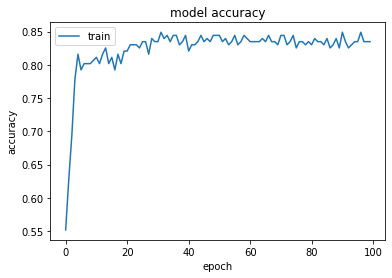

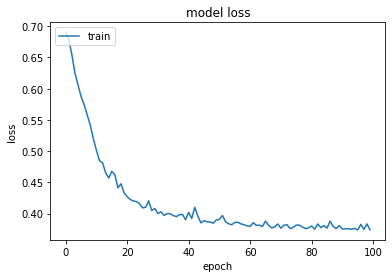

In [63]:

plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','test'],loc='upper left')
plt.show()

# Genetic algorithm

In [64]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 13].values

est = LogisticRegression()

class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            raise ValueError("The population size is not stable.")  
            
    def initilize(self):
        population = []
        for i in range(self.size):
            chromosome = np.ones(self.n_features, dtype=np.bool)
            mask = np.random.rand(len(chromosome)) < 0.3
            chromosome[mask] = False
            population.append(chromosome)
        return population
    

    def fitness(self, population):
        X, y = self.dataset
        scores = []
        for chromosome in population:
            score = -1.0 * np.mean(cross_val_score(self.estimator, X[:,chromosome], y, 
                                                       cv=5, 
                                                       scoring="neg_mean_squared_error"))
            scores.append(score)
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds]), list(population[inds,:])

    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i])
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted))
        random.shuffle(population_next)
        return population_next

    def crossover(self, population):
        population_next = []
        for i in range(int(len(population)/2)):
            for j in range(self.n_children):
                chromosome1, chromosome2 = population[i], population[len(population)-1-i]
                child = chromosome1
                mask = np.random.rand(len(child)) > 0.5
                child[mask] = chromosome2[mask]
                population_next.append(child)
        return population_next
	
    def mutate(self, population):
        population_next = []
        for i in range(len(population)):
            chromosome = population[i]
            if random.random() < self.mutation_rate:
                mask = np.random.rand(len(chromosome)) < 0.05
                chromosome[mask] = False
            population_next.append(chromosome)
        return population_next

    def generate(self, population):
        # Selection, crossover and mutation
        scores_sorted, population_sorted = self.fitness(population)
        population = self.select(population_sorted)
        population = self.crossover(population)
        population = self.mutate(population)
        # History
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
        
        return population
    

    def fit(self, X, y):
 
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initilize()
        for i in range(self.n_gen):
            population = self.generate(population)
            
        return self 
    
    
    def support_(self):
        return self.chromosomes_best[-1]


sel = GeneticSelector(estimator=LogisticRegression(), 
                      n_gen=7, size=200, n_best=40, n_rand=40, 
                      n_children=5, mutation_rate=0.05)
sel.fit(X,y)
score = cross_val_score(est, X, y,scoring="accuracy")

print("Selected Features: %s" % sel.support_())


Selected Features: [ True False  True False False False False  True  True  True  True  True
  True]


In [65]:
X=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]

feature_selected = pd.DataFrame(list(zip(sel.support_(),X)),columns=['feature','selected'])
feature_selected = feature_rank.sort_values(by ='rank')
feature_selected

,rank,feature
7,1,thalach
9,2,oldpeak
2,3,cp
12,4,thal
11,5,ca
0,6,age
3,7,trestbps
4,8,chol
8,9,exang
10,10,slope


In [66]:
accuracyg = round( 100 * np.mean(score) , 2)
#print("Accuracy : {:.2f}".format(100*np.mean(score)))
print('Accuracy                  : ',accuracyg)

#errorg=100-100*np.mean(score)
errorg = round( 100 - accuracyg , 2 )
print('Classification Error Rate : ',errorg)

Accuracy                  :  81.83
Classification Error Rate :  18.17


# Results

In [67]:
table1={'Algorithm':['Naive Bayes','Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Voting','Gradient Boosting','Adaboost','Hybrid','Deep Learning','Genetic algorithm'],
    'Accuracy':[accuracyn,accuracyl,accuracyd,accuracyr,accuracys,accuracyk,accuracyv,accuracyb,accuracya,accuracyh,deepaccuracy,accuracyg],
       'Classification Error Rate':[errorn,errorl,errord,errorr,errors,errork,errorv,errorb,errora,errorh,deeperror,errorg]
}

In [68]:
table2=pd.DataFrame(table1,columns=['Algorithm','Accuracy','Classification Error Rate'])
table2=table2.sort_values(by ='Classification Error Rate')

In [69]:
table2

,Algorithm,Accuracy,Classification Error Rate
9,Hybrid,87.91,12.09
1,Logistic Regression,85.71,14.29
6,Voting,84.62,15.38
3,Random Forest,83.52,16.48
10,Deep Learning,83.52,16.48
11,Genetic algorithm,81.83,18.17
7,Gradient Boosting,81.32,18.68
0,Naive Bayes,80.22,19.78
2,Decision Tree,73.63,26.37
8,Adaboost,73.63,26.37


# Graph

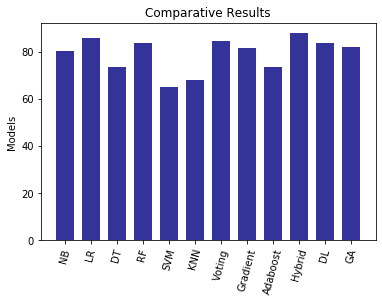

In [86]:
objects = ('NB','LR','DT', 'RF', 'SVM','KNN','Voting','Gradient','Adaboost' ,'Hybrid','DL','GA')
y_pos = np.arange(len(objects))
performance = [accuracyn,accuracyl,accuracyd,accuracyr,accuracys,accuracyk,accuracyv,accuracyb,accuracya,accuracyh,deepaccuracy,accuracyg]

plt.bar(y_pos, performance, align='center',width=0.7, alpha=0.8,color='navy')
plt.xticks(y_pos, objects,rotation=75)
plt.ylabel('Models')
plt.title('Comparative Results')
plt.show()

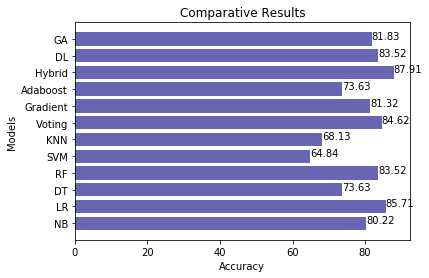

In [94]:
objects = ('NB','LR','DT', 'RF', 'SVM','KNN','Voting','Gradient','Adaboost' ,'Hybrid','DL','GA')
y_pos = np.arange(len(objects))
performance = [accuracyn,accuracyl,accuracyd,accuracyr,accuracys,accuracyk,accuracyv,accuracyb,accuracya,accuracyh,deepaccuracy,accuracyg]

plt.barh(objects,performance, align='center', alpha=0.6,color='navy')
for index, value in enumerate(performance):
    plt.text(value, index, str(value))

#plt.xticks(y_pos, objects,rotation=50)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Comparative Results')
plt.show()

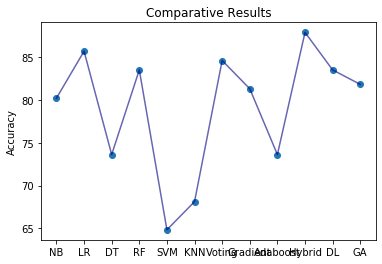

In [93]:
plt.scatter(objects, performance)
plt.plot(objects, performance, alpha=0.6,color='navy')
plt.ylabel('Accuracy')
plt.title('Comparative Results')
plt.show()